In [2]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/utbl_allseg_campavgbl_bltau_twp.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/mustar_allseg_campavgbl_bltau_twp.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/tau_allseg_campavgbl_bltau_twp.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/t_allseg_campavgbl_bltau_twp.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/gf_allseg_campavgbl_bltau_twp.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/segment_info_campavgbl_bltau_twp.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_bltau/trcnames_allseg_twp_bltau.pkl")

In [9]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'] >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

In [4]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF03 

Text(8, 1, 'RF03')

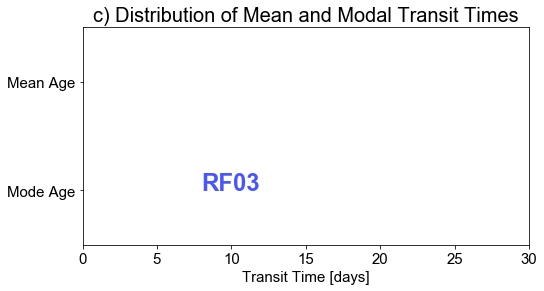

In [5]:
############## RF03 ALONE ##############
thisrf = 'RF03'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])


In [6]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF04

Text(8, 1, 'RF04')

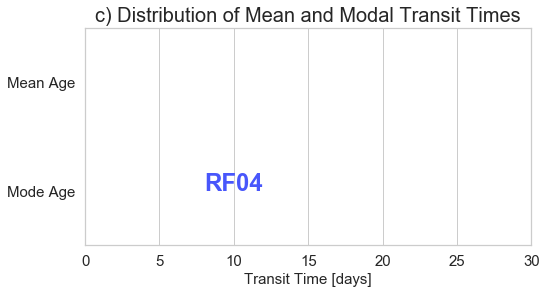

In [7]:
############## RF04 ALONE ##############
thisrf = 'RF04'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])


In [8]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF05 

,r squared,mean age,mode age
count,12.000000,12.000000,12.000000
mean,0.785591,7.468939,1.976411
std,0.066933,2.388915,0.565438
min,0.659513,3.534931,1.039063
25%,0.755265,6.030227,1.663607
50%,0.787278,6.726100,1.789063
75%,0.822698,9.217559,2.351563
max,0.891897,11.850897,3.039063


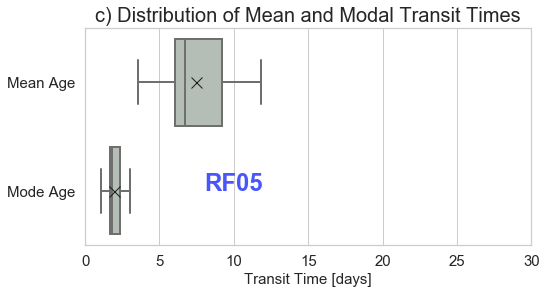

In [10]:
############## RF05 ALONE ##############
thisrf = 'RF05'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

(0, 1.5)

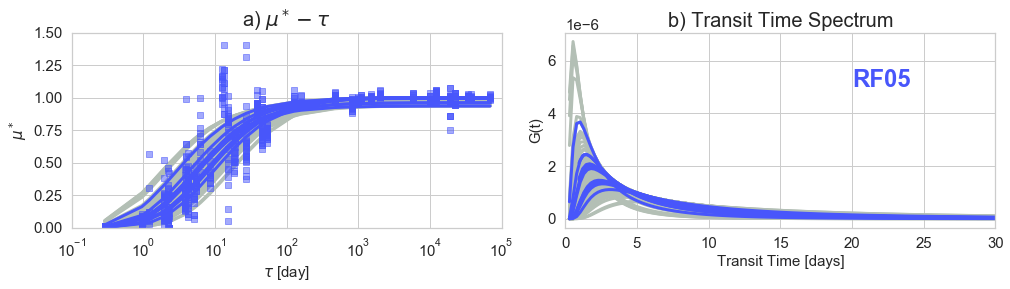

In [48]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [24]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF06 

,r squared,mean age,mode age
count,4.000000,4.000000,4.000000
mean,0.760590,5.153294,1.414063
std,0.044893,2.184441,0.629153
min,0.695248,2.105795,0.539063
25%,0.750345,4.573983,1.289063
50%,0.775922,5.615918,1.539063
75%,0.786167,6.195229,1.664063
max,0.795267,7.275545,2.039063


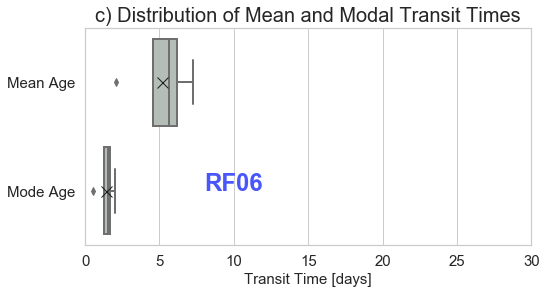

In [11]:
############## RF06 ALONE ##############
thisrf = 'RF06'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

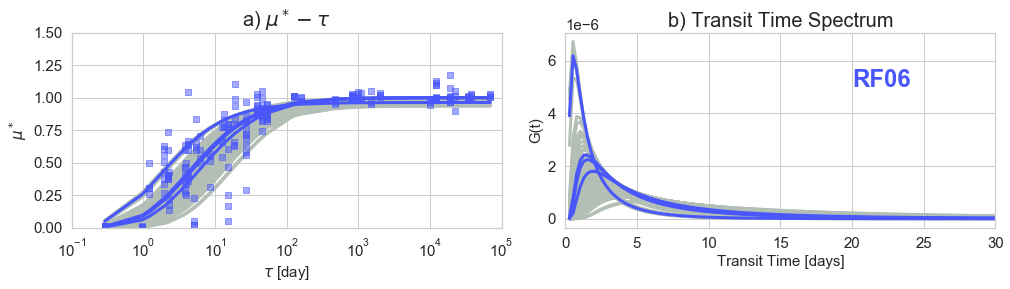

In [51]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [27]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF07

,r squared,mean age,mode age
count,10.000000,10.000000,10.000000
mean,0.742274,4.193433,1.089063
std,0.066038,1.809522,0.468449
min,0.652528,1.931381,0.539063
25%,0.689120,2.624805,0.601563
50%,0.735713,4.201976,1.164063
75%,0.778851,5.527879,1.476563
max,0.846108,7.229786,1.789063


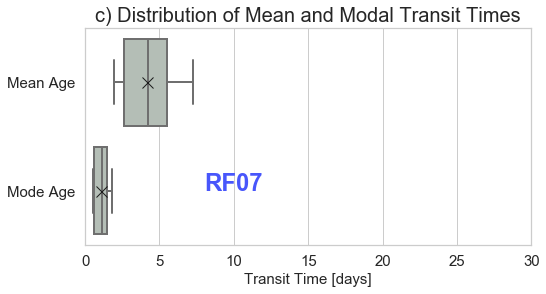

In [12]:
############## RF07 ALONE ##############
thisrf = 'RF07'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

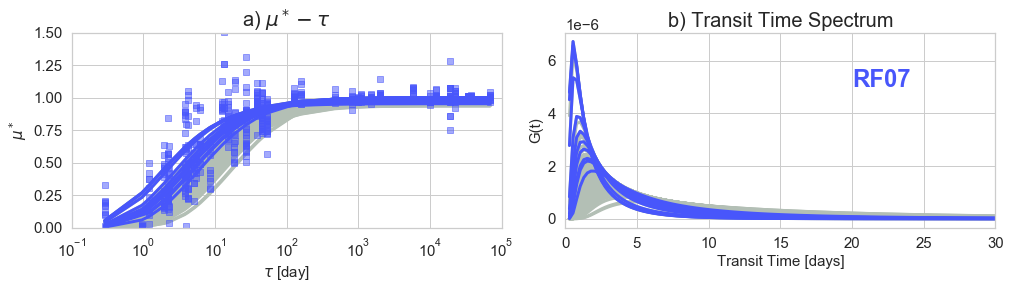

In [53]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [17]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF08 

,r squared,mean age,mode age
count,12.000000,12.000000,12.000000
mean,0.876545,8.021942,2.115401
std,0.035429,1.659979,0.454196
min,0.803602,5.776470,1.539063
25%,0.859724,6.460435,1.726563
50%,0.872553,8.132161,2.164063
75%,0.897749,8.799966,2.351563
max,0.941826,11.492367,2.955122


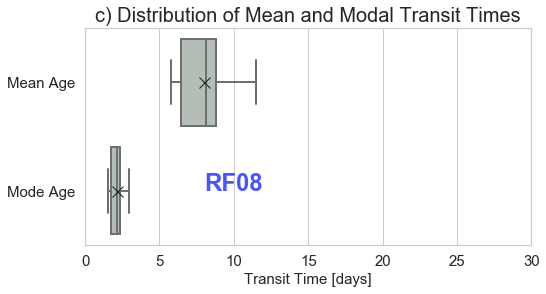

In [13]:
############## RF08 ALONE ##############
thisrf = 'RF08'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

(0, 1.5)

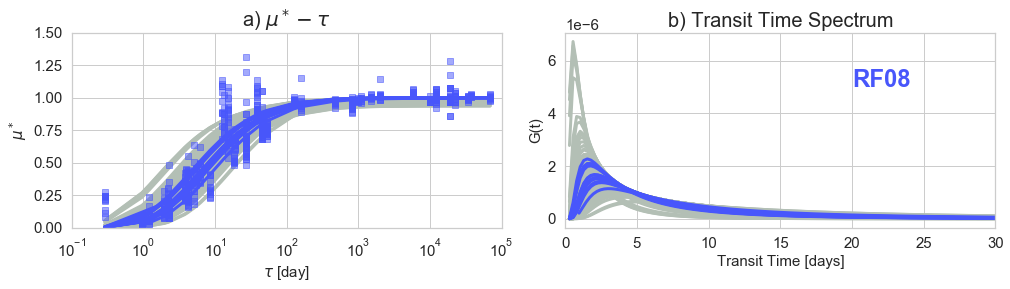

In [56]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [ ]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF09 

,r squared,mean age,mode age
count,9.000000,9.000000,9.000000
mean,0.873376,6.364584,1.677952
std,0.032416,1.065426,0.282597
min,0.807302,5.019510,1.289063
25%,0.857032,5.662627,1.539063
50%,0.879225,6.213666,1.539063
75%,0.892125,7.009361,1.789063
max,0.921235,8.452478,2.289063


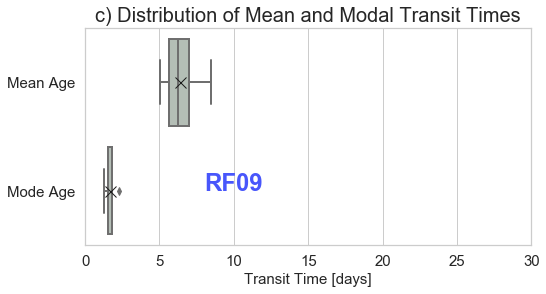

In [14]:
############## RF09 ALONE ##############
thisrf = 'RF09'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

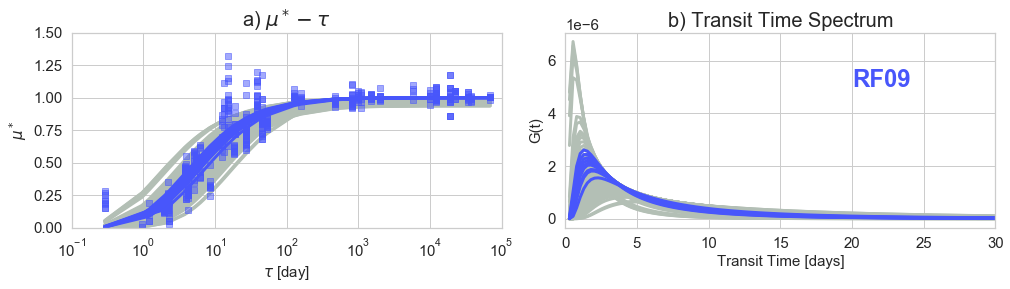

In [58]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [35]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF10

,r squared,mean age,mode age
count,13.000000,13.000000,13.000000
mean,0.847941,7.427768,1.923678
std,0.042068,1.072446,0.299572
min,0.760572,5.835124,1.539063
25%,0.823801,6.316098,1.789063
50%,0.856212,7.873540,2.039063
75%,0.870959,8.152744,2.039063
max,0.912273,9.422434,2.539063


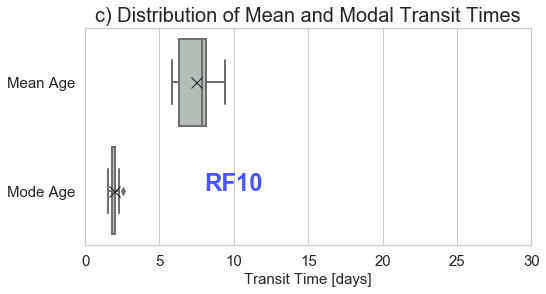

In [15]:
############## RF05 ALONE ##############
thisrf = 'RF10'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

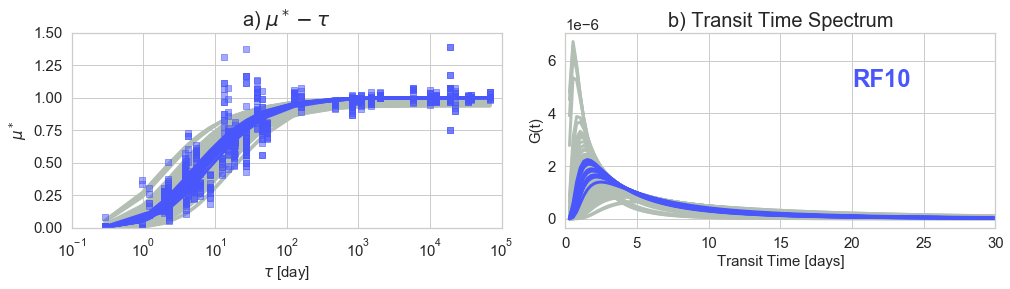

In [60]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [4]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF11

,r squared,mean age,mode age
count,12.000000,12.000000,12.000000
mean,0.882626,10.031424,2.680081
std,0.049330,4.998909,1.351780
min,0.745246,5.718983,1.539063
25%,0.868902,7.236199,1.920602
50%,0.893108,7.944468,2.164063
75%,0.912433,10.418937,2.830578
max,0.936580,20.527447,5.539063


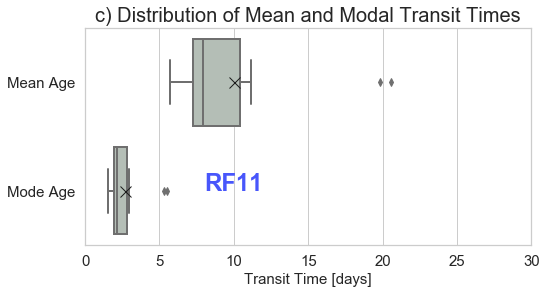

In [16]:
############## RF05 ALONE ##############
thisrf = 'RF11'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

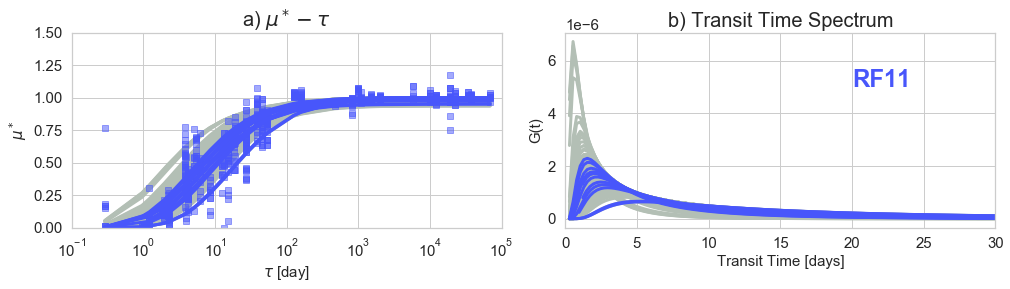

In [75]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
ax0.grid(which = 'major')
ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [5]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF12

,r squared,mean age,mode age
count,27.000000,27.000000,27.000000
mean,0.862108,10.713803,2.823337
std,0.058415,1.830473,0.470726
min,0.718722,8.038720,2.039063
25%,0.839216,9.659975,2.539063
50%,0.876217,10.356189,2.789063
75%,0.902315,11.217397,3.039063
max,0.943716,14.929052,4.039063


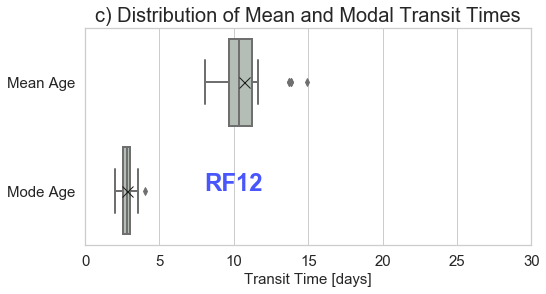

In [17]:
############## RF05 ALONE ##############
thisrf = 'RF12'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

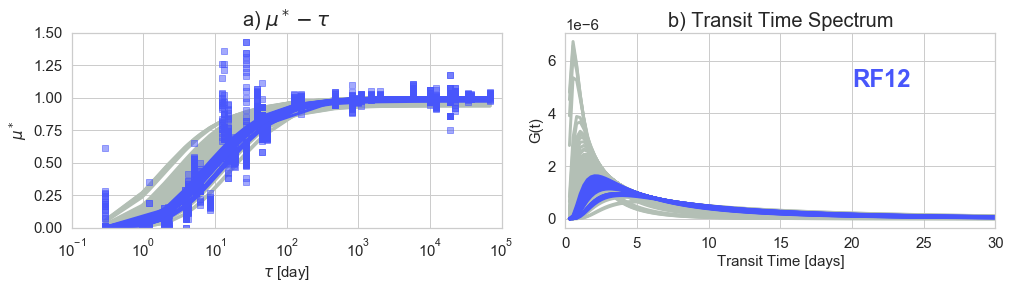

In [64]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [65]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF13

,r squared,mean age,mode age
count,37.000000,37.000000,37.000000
mean,0.885926,9.184880,2.417573
std,0.055015,2.843437,0.740761
min,0.745505,4.075299,1.039063
25%,0.852483,6.817881,1.789063
50%,0.898620,8.911140,2.289063
75%,0.922692,11.266650,3.039063
max,0.955449,14.551102,3.789063


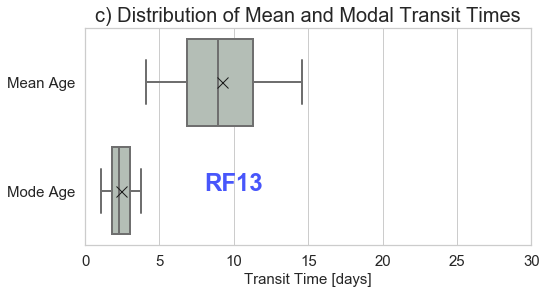

In [18]:
############## RF13 ALONE ##############
thisrf = 'RF13'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

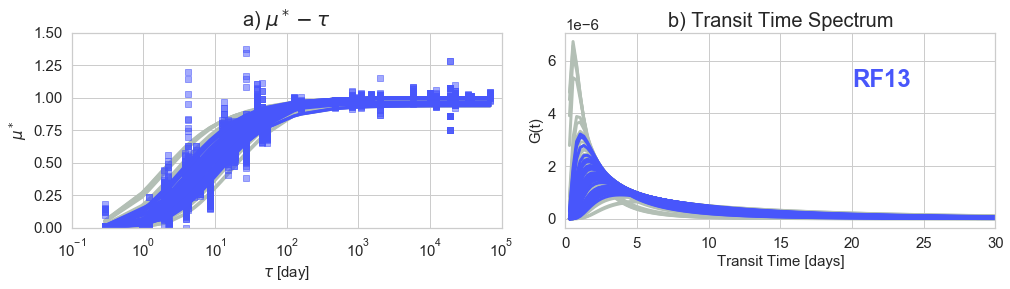

In [67]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])


In [68]:
###########################################################################################
###########################################################################################
###########################################################################################
# RF14 

,r squared,mean age,mode age
count,9.000000,9.000000,9.000000
mean,0.923995,13.023202,3.418625
std,0.021181,1.919284,0.478988
min,0.878783,10.450336,2.789063
25%,0.911946,11.160553,3.039063
50%,0.929451,12.916146,3.289063
75%,0.936973,14.369213,3.789063
max,0.945532,16.190663,4.289063


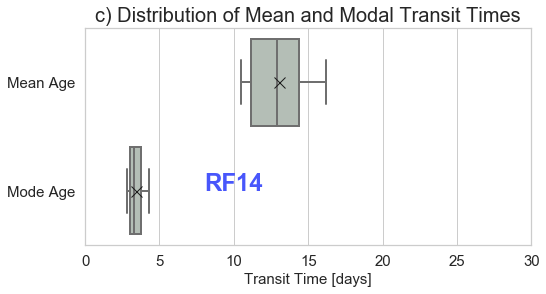

In [19]:
############## RF14 ALONE ##############
thisrf = 'RF14'
rf_info = seg_info_screened[seg_info_screened['Flight'] == thisrf]
rf_idx = rf_info.index.values
rf_info

############ --------------- MEAN, MODE BOXPLOTS --------------- ###########
# isolate mean and mode 
rf = pd.DataFrame()
rf['Mean Age'] = rf_info['mean age'].values
rf['Mode Age'] = rf_info['mode age'].values

# plot 
mygray = [0.70, 0.75, 0.71]

fig, ax = plt.subplots(figsize=(8, 4), ncols=1)
sns.set(font_scale=1)
sns.set_style("whitegrid")
ax = sns.boxplot(data = rf, linewidth = 2, orient = 'h', color = mygray, 
                notch = False, showmeans=True, meanprops={"marker":"x","markeredgecolor":"k",
                                           "markerfacecolor":"k", "markersize":11})

#ax.grid(which = 'major')
sns.set_style("whitegrid")
ax.set_title('c) Distribution of Mean and Modal Transit Times', fontsize = 20)
ax.set_xlabel("Transit Time [days]" ,fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xlim([0, 30])
ax.text(8, 1, thisrf, fontsize = 24, weight = 'bold', color = color[1])
rf_info.describe()

/Volumes/scdrive2/TTS_2020/base_tts_code/tts_mod.py:100: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (my_color == 'k'):


(0, 1.5)

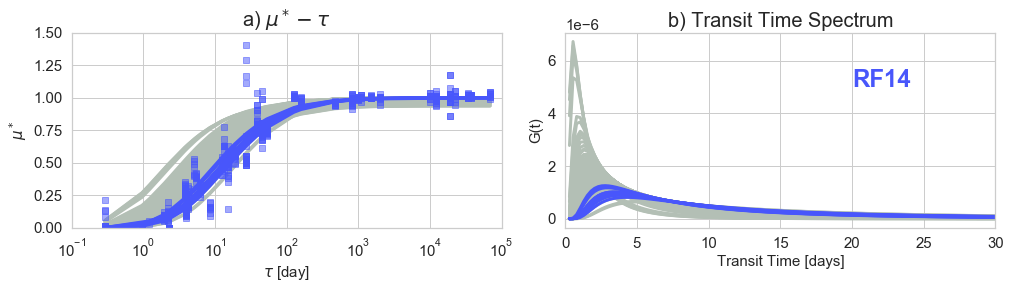

In [70]:
############ --------------- PLOT IT! --------------- ###########
add_meanmode = 0
add_scatter = 0
add_r2 = 0

############################################################
# all segments 
for idx in np.arange(0, (len(gf_allseg_screened.columns))):
    # pull that column 
    my_r2 = seg_info_screened['r squared'].iloc[idx]
    mean_age = seg_info_screened['mean age'].iloc[idx]
    mode_age = seg_info_screened['mode age'].iloc[idx]
    #
    my_tau = tau_allseg_screened.iloc[:,idx].values
    my_mustar = mustar_allseg_screened.iloc[:,idx].values
    my_utbl = utbl_allseg_screened.iloc[:,idx].values
    #
    my_gf = gf_allseg_screened.iloc[:,idx].values
    my_t = t_allseg_screened.iloc[:,idx].values
                                         
    # plotting factors 
    title_str = ' '
    my_color = [0.70, 0.75, 0.71] #ash gray    add_scatter = 0
    add_r2 = 0
    add_meanmode = 0
    #plot 
    if (idx == 0):
        overplot = 0
        width = 0
        height = 0
        my_ax = 0
        
        fig, my_ax, width, height = tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
    else: 
        overplot = 1
        tts_mod.plot_tts(my_tau, my_mustar, my_utbl, my_r2, 
                                             my_gf, my_t, mean_age, mode_age, 
                                             my_color, overplot, add_scatter, add_r2, add_meanmode, 
                                             my_ax, width, height, title_str)
# add extremes with scatter and r^2 

############################################################
from matplotlib.pyplot import cm
color=cm.rainbow(np.linspace(0,1,10))

for p, i in enumerate(rf_idx): 
    utbl = utbl_allseg_screened[i].values
    mustar = mustar_allseg_screened[i].values
    tau = tau_allseg_screened[i].values
    gf = gf_allseg_screened[i].values
    t = t_allseg_screened[i].values
    r2 = rf_info['r squared'].loc[i]
    mean_age = rf_info['mean age'].loc[i]
    mode_age = rf_info['mode age'].loc[i]
                                    
    # plotting factors 
    title_str = ' '
    my_color = color[1]
    add_r2 = 0
    add_meanmode = 0
    add_scatter = 1
    #plot 
    overplot = 1
    tts_mod.plot_tts(tau, mustar, utbl, r2, 
                     gf, t, mean_age, mode_age, 
                     my_color, overplot, add_scatter, add_r2, add_meanmode, 
                     my_ax, width, height, title_str)
   
# add grid
ax0, ax1 = my_ax
ax1.text(20, 5e-6, thisrf, fontsize = 24, weight = 'bold', color = my_color)
#ax0.grid(which = 'major')
#ax1.grid(which = 'major')
ax0.set_ylim([0, 1.5])
